**OUTLIER DETECTION AND HANDLING - CATEGORICAL DATA**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
from IPython.display import IFrame
import webbrowser

**Generating a pandas dataframe from the source .csv file**

In [2]:
# Set options to show all columns
pd.set_option('display.max_columns', None)

# Load csv file and generate pandas dataframe
input_csv = r'..\data\clean\after_step_2_enhancing.csv' # Fill your path to file
enhanced_dataset_1 = pd.read_csv(input_csv, sep = ',')

enhanced_dataset_1.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,0,0,1,0,370,NaN,4,To renovate,0,F,767.0,2552.000000,415.906128,East Flanders,NaN,True
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,0,0,1,0,895,Installed,2,Good,0,D,1050.0,1796.401198,285.713333,East Flanders,NaN,True
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,20,Semi equipped,2,To renovate,0,E,120.0,1785.714286,2291.666667,Antwerp,NaN,True
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,300,NaN,3,To renovate,0,F,309.0,1715.116279,954.692557,Brabant_Wallon,NaN,True
4,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,4.047057,0,0,1,40,32,Installed,3,Good,0,C,NaN,1600.000000,NaN,Brabant_Wallon,NaN,True


**Saving data to a new .csv file and a .pkl file**

**Categorical data - subtype**

*Checking for missing values and displaying the distribution of the amount of properties over the category*

Mean:  0.0
Amount of missing values:  0
Subtype
House    5756
Name: count, dtype: int64


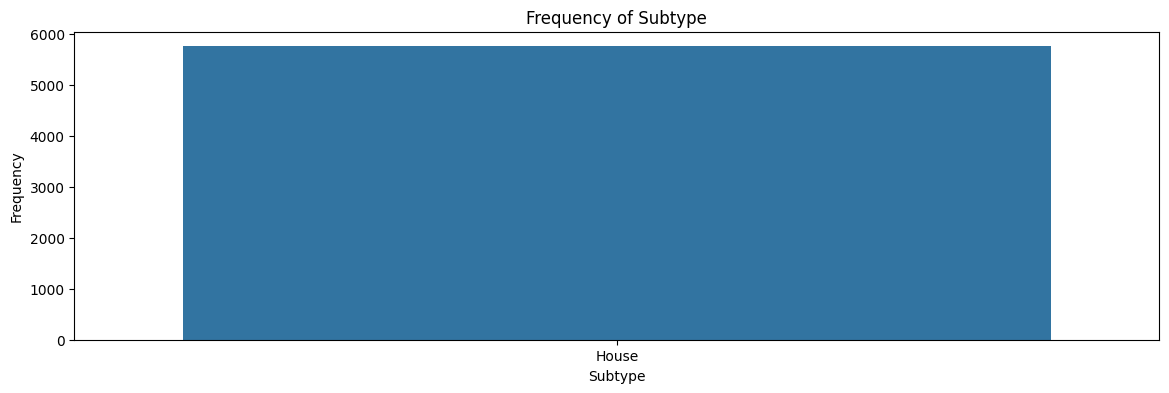

In [3]:
#Check the missing values
print("Mean: ",enhanced_dataset_1['Subtype'].isnull().mean()*100)
print("Amount of missing values: ", enhanced_dataset_1['Subtype'].isnull().sum())
frequency = enhanced_dataset_1['Subtype'].value_counts()
print(frequency)

#Detecting Outliers on plot

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequency of Subtype')
plt.xlabel('Subtype')
plt.ylabel('Frequency')
plt.show()

*Creating a frequency dataframe and Determining rare values*

In [4]:
# Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['subtype', 'count']

print(frequency_df)

  subtype  count
0   House   5756


In [5]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(enhanced_dataset_1)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: Series([], Name: count, dtype: int64)


*Encoding - One-Hot Encoding*

In [6]:
#Here we will use One-Hot Encoding (pd.get_dummies) because this is a nominal (unordered) column and the number of categories is small.
df_one_hot_subtype = pd.get_dummies(enhanced_dataset_1.copy(), columns=['Subtype'], prefix='Subtype', drop_first=True)

df_one_hot_subtype.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5756 non-null   int64  
 1   locality_name       5756 non-null   object 
 2   Postal_code         5756 non-null   int64  
 3   Price               5756 non-null   int64  
 4   Number_of_bedrooms  5756 non-null   int64  
 5   Living_area         5756 non-null   int64  
 6   street              5756 non-null   object 
 7   number              5738 non-null   object 
 8   latitude            5753 non-null   float64
 9   longitude           5753 non-null   float64
 10  Open_fire           5756 non-null   int64  
 11  Swimming_Pool       5756 non-null   int64  
 12  hasTerrace          5756 non-null   int64  
 13  terraceSurface      5756 non-null   int64  
 14  gardenSurface       5756 non-null   int64  
 15  Kitchen_type        3576 non-null   object 
 16  Number

**KITCHEN_TYPE**


*Checking for missing values and displaying the distribution of the amount of properties over the category*

In [7]:
#Checking the missing values
print("Mean: ", enhanced_dataset_1['Kitchen_type'].isnull().mean()*100)
print("Count of missing values: ", enhanced_dataset_1['Kitchen_type'].isnull().sum())

frequency = enhanced_dataset_1['Kitchen_type'].value_counts()
print(frequency)

Mean:  37.87352328005559
Count of missing values:  2180
Kitchen_type
Installed             1878
Hyper equipped         838
Semi equipped          607
Not installed          195
Usa installed           29
Usa hyper equipped      24
Usa uninstalled          4
Usa semi equipped        1
Name: count, dtype: int64


In [8]:
#Dealing with the high number of missing values
#df['Kitchen_type'] = df['Kitchen_type'].apply(lambda x: 'Missing' if pd.isna(x) else x)

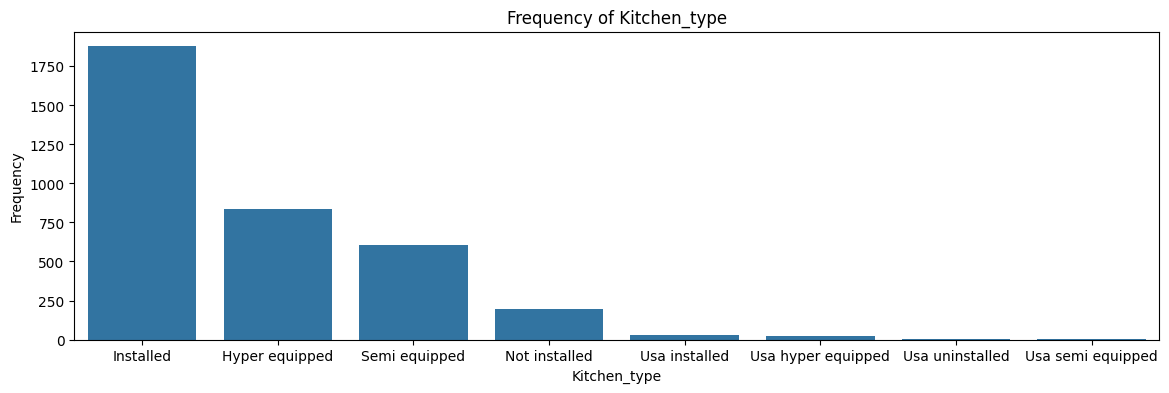

In [9]:
#Detecting Outliers on plot

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequency of Kitchen_type')
plt.xlabel('Kitchen_type')
plt.ylabel('Frequency')
plt.show()

*Creating a frequency dataframe and Determining rare values*

In [10]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['Kitchen_type', 'count']

print(frequency_df)

         Kitchen_type  count
0           Installed   1878
1      Hyper equipped    838
2       Semi equipped    607
3       Not installed    195
4       Usa installed     29
5  Usa hyper equipped     24
6     Usa uninstalled      4
7   Usa semi equipped      1


In [11]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(enhanced_dataset_1)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: Kitchen_type
Not installed         195
Usa installed          29
Usa hyper equipped     24
Usa uninstalled         4
Usa semi equipped       1
Name: count, dtype: int64


**State_of_building**

*Checking for missing values and displaying the distribution of the amount of properties over the category*

Mean:  9.364141765114663
Count of missing values:  539
State_of_building
Good              2273
As new            1064
To renovate        938
To be done up      597
Just renovated     307
To restore          38
Name: count, dtype: int64


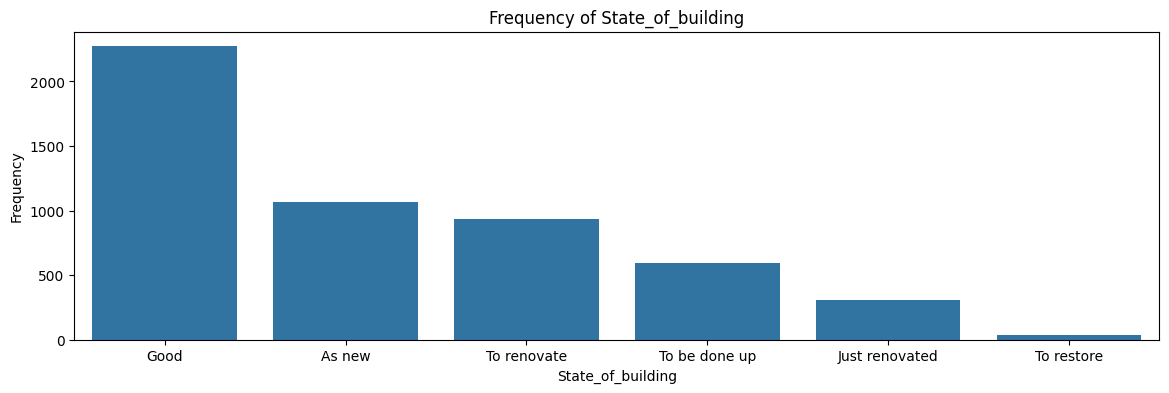

In [12]:
#Checking the missing values
print("Mean: ", enhanced_dataset_1['State_of_building'].isnull().mean()*100)
print("Count of missing values: ", enhanced_dataset_1['State_of_building'].isnull().sum())

frequency = enhanced_dataset_1['State_of_building'].value_counts()
print(frequency)

#Detecting Outliers on plot

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequency of State_of_building')
plt.xlabel('State_of_building')
plt.ylabel('Frequency')
plt.show()

*Dealing with missing values (Imputation)*

In [13]:
#Dealing with missing values (Imputation)

enhanced_dataset_1['State_of_building'] = enhanced_dataset_1['State_of_building'].fillna(enhanced_dataset_1['State_of_building'].mode()[0])
frequency = enhanced_dataset_1['State_of_building'].value_counts()
frequency

#Missing is also a possibility here???

#df['State_of_building'] = df['State_of_building'].fillna('Missing')

State_of_building
Good              2812
As new            1064
To renovate        938
To be done up      597
Just renovated     307
To restore          38
Name: count, dtype: int64

*Creating a separate frequency dataframe and Determining rare values*

In [14]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['State_of_building', 'count']

print(frequency_df)

  State_of_building  count
0              Good   2812
1            As new   1064
2       To renovate    938
3     To be done up    597
4    Just renovated    307
5        To restore     38


In [15]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(enhanced_dataset_1)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: State_of_building
To restore    38
Name: count, dtype: int64


In [16]:
#Assign the rare value to another value
category_map = {'To restore': 'To renovate'}
enhanced_dataset_1['State_of_building'] = enhanced_dataset_1['State_of_building'].map(category_map).fillna(enhanced_dataset_1['State_of_building'])

frequency = enhanced_dataset_1['State_of_building'].value_counts()
frequency

State_of_building
Good              2812
As new            1064
To renovate        976
To be done up      597
Just renovated     307
Name: count, dtype: int64

**Categorical data: EPC**

*Checking for missing values and displaying the distribution of the amount of properties over the category*

Mean:  4.534398888116748
Count of missing values:  261
epc
F      1078
C      1074
D      1021
B       914
E       633
A       488
G       217
A+       51
A++      19
Name: count, dtype: int64


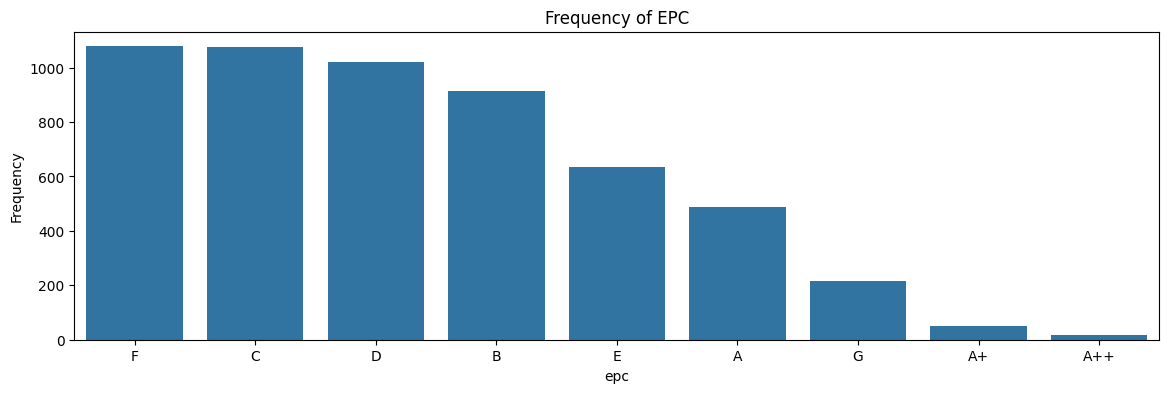

In [17]:
#Checking the missing values
print("Mean: ", enhanced_dataset_1['epc'].isnull().mean()*100)
print("Count of missing values: ", enhanced_dataset_1['epc'].isnull().sum())

frequency = enhanced_dataset_1['epc'].value_counts()
print(frequency)

#Detecting Outliers on plot

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequency of EPC')
plt.xlabel('epc')
plt.ylabel('Frequency')
plt.show()

*Creating a separate frequency dataframe and Determining rare values*

In [18]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['epc', 'count']

print(frequency_df)

   epc  count
0    F   1078
1    C   1074
2    D   1021
3    B    914
4    E    633
5    A    488
6    G    217
7   A+     51
8  A++     19


In [19]:
#Determining the rare values (threshold 5%)
threshold = 0.05 * len(enhanced_dataset_1)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: epc
G      217
A+      51
A++     19
Name: count, dtype: int64


*Dealing with missing values (Imputation)*

In [20]:
#Dealing with missing values (Imputation)

enhanced_dataset_1['epc'] = enhanced_dataset_1['epc'].fillna(enhanced_dataset_1['epc'].mode()[0])
frequency = enhanced_dataset_1['epc'].value_counts()
frequency

#Missing is also a possibility here???

#df['epc'] = df['epc'].fillna('Missing')

epc
F      1339
C      1074
D      1021
B       914
E       633
A       488
G       217
A+       51
A++      19
Name: count, dtype: int64

In [21]:
#Assign the rare value to another value (EPC G only exist in Brussels and Wallonia)
category_map = {'A+': 'A', 'A++': 'A', 'G':'F'}
enhanced_dataset_1['epc'] = enhanced_dataset_1['epc'].map(category_map).fillna(enhanced_dataset_1['epc'])

frequency = enhanced_dataset_1['epc'].value_counts()
frequency

epc
F    1556
C    1074
D    1021
B     914
E     633
A     558
Name: count, dtype: int64

**Saving data to a new .csv file and a .pkl file**

In [22]:
# Save data to new csv file

output_csv = r'..\data\clean\after_step_3a_outliers_cat.csv'  # Fill your path to file
enhanced_dataset_1.to_csv(output_csv, index=False)


# Save data to new pkl file

import pickle
output_pkl = r'..\data\clean\after_step_3a_outliers_cat.pkl' # Fill your path to file
with open(output_pkl, 'wb') as f:
    pickle.dump(enhanced_dataset_1, f)
